In [1]:
import keras
from keras.layers import Flatten,Dense
from keras.preprocessing.image import array_to_img,load_img,img_to_array
from keras.models import Model
from keras.applications import imagenet_utils,vgg16,resnet50

import numpy  as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline



import os
image_dir='random_images/'
fnames=[os.path.join(image_dir,fname) for fname in os.listdir(image_dir)]

print(fnames)

/home/ania/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


['random_images/dog.jpg', 'random_images/tomato.jpeg', 'random_images/monkey.jpeg', 'random_images/cat.2683.jpg', 'random_images/hot_air_ballon.jpeg', 'random_images/broccali.jpg', 'random_images/cucumber.jpg', 'random_images/Hot-Black-Tea.jpg', 'random_images/Baby-Elephant.jpg', 'random_images/cat.jpeg', 'random_images/hamster.jpg', 'random_images/koala.jpg', 'random_images/example_5.JPG', 'random_images/Afghan_hound_00106.jpg', 'random_images/cat_3.jpeg', 'random_images/hedgehog.jpeg', 'random_images/flower.jpg', 'random_images/dock.jpeg']


In [2]:
model_resnet50=resnet50.ResNet50(input_shape=(224,224,3),include_top=True,weights='imagenet')


In [11]:
def preprocess_img(img_path):
    
    img=load_img(img_path)
    width,height=img.size
    print(width,height)
    
    if (height<width):

        im_height_n=224

        im_width_n=int(width*im_height_n/height)
        
    else:
        
        im_width_n=224
        im_height_n=int(height*im_width_n/width)
        
    desired_width, desired_height = 224, 224
    
    img = img.resize((im_width_n, im_height_n))
    
    print(img.size)
    #img=img_to_array(img)
    #img = array_to_img(img, scale=False)
    #plt.imshow(img)
    #plt.show()
    if im_width_n < desired_width:
        desired_width = im_width_n
    if im_height_n < desired_height:
        desired_height = im_height_n       
        
    start_x = np.maximum(0, int(im_width_n-desired_width)/2)  #280,224
    start_y= np.maximum(0, int(im_height_n-desired_height)/2)

    img_crop = img.crop((start_x, start_y, start_x+desired_width, start_y+desired_height))
    #plt.imshow(img)
    #plt.show()
    #img_crop= img.resize((224, 224))
    #plt.imshow(img)
    #plt.show()

    img = img_to_array(img_crop)
    
    print(img.size)
    img=np.expand_dims(img,axis=0)  #add one dimension to get 1,width,height for batch size
    img=resnet50.preprocess_input(img)
    return img,img_crop

1280 1024
(280, 224)
150528


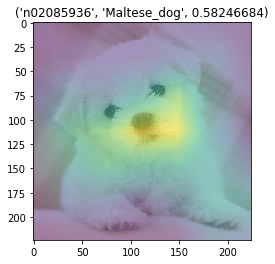

256 197
(291, 224)
150528


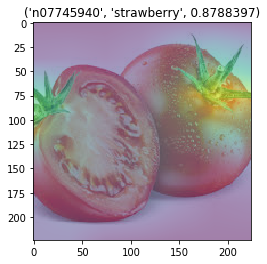

266 190
(313, 224)
150528


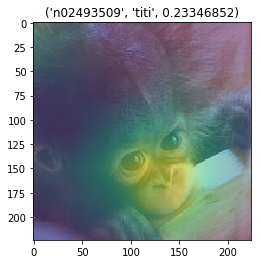

320 239
(299, 224)
150528


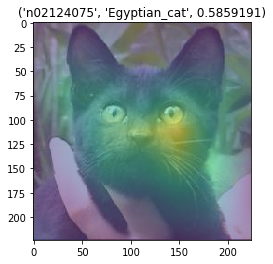

534 712
(224, 298)
150528


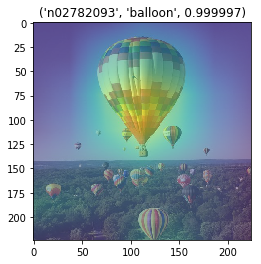

575 419
(307, 224)
150528


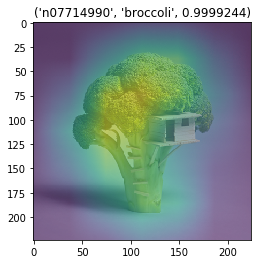

1000 1000
(224, 224)
150528


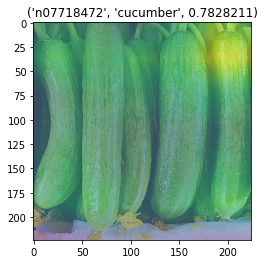

512 382
(300, 224)
150528


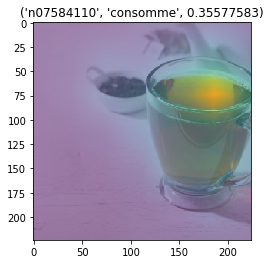

728 536
(304, 224)
150528


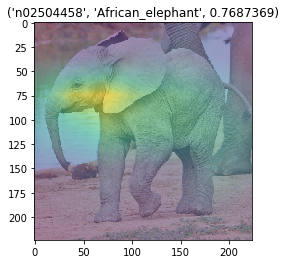

300 168
(400, 224)
150528


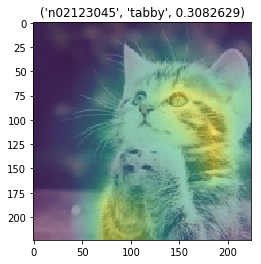

880 529
(372, 224)
150528


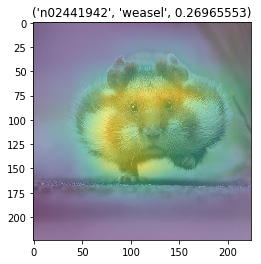

940 627
(335, 224)
150528


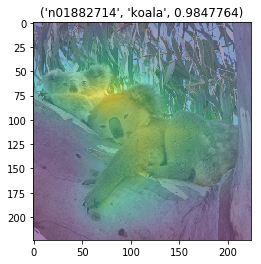

100 100
(224, 224)
150528


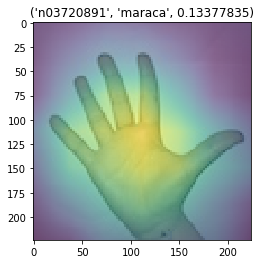

500 444
(252, 224)
150528


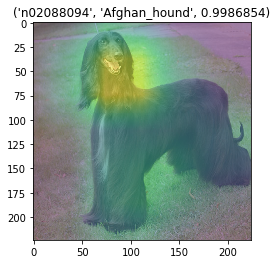

268 188
(319, 224)
150528


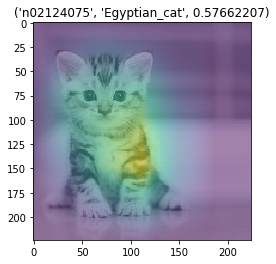

527 350
(337, 224)
150528


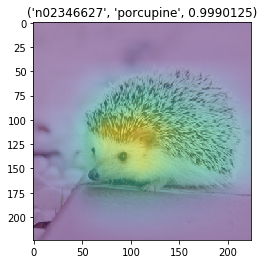

600 600
(224, 224)
150528


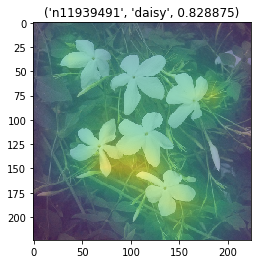

299 168
(398, 224)
150528


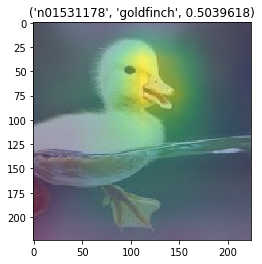

In [13]:

for img_path in fnames:

    input_img,img_crop=preprocess_img(img_path)


    #model_resnet50=resnet50.ResNet50(input_shape=(224,224,3),include_top=True,weights='imagenet')

    result=model_resnet50.predict(input_img)
    result_arg=result.argmax()   #max arg index
    result_decoded=imagenet_utils.decode_predictions(result,top=10)

    #weight 

    layer_fc1000=model_resnet50.get_layer('fc1000')

    weight_fc1000=layer_fc1000.get_weights()[0]

    #model_resnet50.summary()

    resnet50_last_conv=model_resnet50.get_layer('activation_49')
    model_resnet50_last_conv=Model(inputs=model_resnet50.input,outputs=resnet50_last_conv.output)

    layer_2048=model_resnet50_last_conv.predict(input_img)[0]  #activation 512 filters

    #layer_2048

    W=weight_fc1000[:,result_arg]
    filter_after_dot=layer_2048.dot(W)



    img_filter_zoomout=scipy.ndimage.zoom(filter_after_dot,(32,32),order=1)

    plt.imshow(img_crop,alpha=0.8)
    plt.imshow(img_filter_zoomout,alpha=0.5)
    plt.title(imagenet_utils.decode_predictions(result,top=10)[0][0])
    plt.show()

